Do the following exercise.

1) Clone https://github.com/adamnguyenitvn/bigdata_labs_2019

2) Open sales.ipynb

3) Make a copy of sales.ipynb, name it with your student ID

4) Do the exercise

5) Write your github username here http://socrates.io/#KFCbqAn  . We will add you to the repos for push permission

6) Check your email for github invitation

7) Push your Jupyter notebook to github

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

order_id                       name           ordered_at  price  quantity  \
0     10000   "ICE CREAM" Peanut Fudge  2018-01-01 11:30:00  $3.50         3   
1     10000   "ICE CREAM" Peanut Fudge  2018-01-01 11:30:00  $3.50         1   
2     10001         "SORBET" Raspberry  2018-01-01 12:14:54  $2.50         2   
3     10001                        NaN  2018-01-01 12:14:54  $1.50         1   
4     10001  "CONE" Dipped Waffle Cone  2018-01-01 12:14:54  $3.50         1   

  line_total  
0     $10.50  
1      $3.50  
2      $5.00  
3      $1.50  
4      $3.50

In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
# change ordered_ate to datetime
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [6]:
# change price to float
df['price'] = df['price'].map(lambda x: x.lstrip('$'))
df["price"] = pd.to_numeric(df["price"])

In [7]:
# change line_total to float
df['line_total'] = df['line_total'].map(lambda x: x.lstrip('$'))
df["line_total"] = pd.to_numeric(df["line_total"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29922 entries, 0 to 29921
Data columns (total 6 columns):
order_id      29922 non-null int64
name          28434 non-null object
ordered_at    29922 non-null datetime64[ns]
price         29922 non-null float64
quantity      29922 non-null int64
line_total    29922 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.4+ MB


In [9]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [10]:
df[df.duplicated()].shape[0]

538

In [20]:
df.isnull().sum()

order_id         0
name          1488
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [23]:
df[df["name"].isnull()].sample(5)

order_id name          ordered_at  price  quantity  line_total
27382     19188  NaN 2018-07-11 10:39:46    2.0         2         4.0
19596     16574  NaN 2018-05-18 12:18:10    2.5         3         7.5
21752     17310  NaN 2018-06-02 17:32:56    1.5         2         3.0
16667     15561  NaN 2018-04-26 15:21:47    3.5         2         7.0
10422     13471  NaN 2018-03-15 00:17:23    1.5         1         1.5

In [30]:
df.dropna(inplace=True)

In [31]:
df.duplicated().sum()

531

In [35]:
df.drop_duplicates(inplace= True)

In [36]:
df.duplicated().sum()

0

In [12]:
df[df['name'].isnull()].head()

order_id name          ordered_at  price  quantity  line_total
3      10001  NaN 2018-01-01 12:14:54    1.5         1         1.5
6      10002  NaN 2018-01-01 12:23:09    3.0         3         9.0
27     10007  NaN 2018-01-01 15:03:17    2.5         1         2.5
77     10026  NaN 2018-01-02 03:25:40    0.5         2         1.0
88     10031  NaN 2018-01-02 05:45:48    3.5         3        10.5

#### Sanity check for value ranges and to check assumptions

In [13]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

29

In [39]:
df[df['line_total'] < 0].sample(5)

order_id                        name          ordered_at  price  \
25957     18707  "ICE CREAM" Dark Chocolate 2018-07-01 02:27:02   -4.0   
3822      11283         "BEVERAGE" Espresso 2018-01-28 06:27:26   -2.5   
26253     18803  "ICE CREAM" Dulce De Leche 2018-07-03 06:56:40   -1.5   
6368      12136         "BEVERAGE" Espresso 2018-02-15 11:27:43   -2.5   
8331      12794       "ICE CREAM" Mint Chip 2018-03-01 07:06:20   -1.5   

       quantity  line_total  
25957         3       -12.0  
3822          1        -2.5  
26253         2        -3.0  
6368          1        -2.5  
8331          2        -3.0

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [47]:
df = df[(df["price"] * df["quantity"]) == df["line_total"]]

In [48]:
df = df[df["line_total"] >= 0]

In [49]:
df.describe()

order_id         price      quantity    line_total
count  27596.000000  27596.000000  27596.000000  27596.000000
mean   14993.365995      2.511596      2.000833      5.028845
std     2888.622150      1.059402      0.819472      3.085841
min    10000.000000      0.500000      1.000000      0.500000
25%    12499.000000      1.500000      1.000000      2.500000
50%    14972.500000      2.500000      2.000000      4.500000
75%    17506.250000      3.500000      3.000000      7.500000
max    19999.000000      4.000000      3.000000     12.000000

#### TODO: Get value between "" in name and put it in category column

In [58]:
# pattern = r'\"(.+?)\"'

df["category"] = df.apply(lambda x: x['name'].split('"')[1], axis=1)

In [59]:
df.head()

order_id                       name          ordered_at  price  quantity  \
0     10000   "ICE CREAM" Peanut Fudge 2018-01-01 11:30:00    3.5         3   
1     10000   "ICE CREAM" Peanut Fudge 2018-01-01 11:30:00    3.5         1   
2     10001         "SORBET" Raspberry 2018-01-01 12:14:54    2.5         2   
4     10001  "CONE" Dipped Waffle Cone 2018-01-01 12:14:54    3.5         1   
5     10002            "SORBET" Lychee 2018-01-01 12:23:09    3.0         1   

   line_total   category  
0        10.5  ICE CREAM  
1         3.5  ICE CREAM  
2         5.0     SORBET  
4         3.5       CONE  
5         3.0     SORBET

#### Analysis, finally!

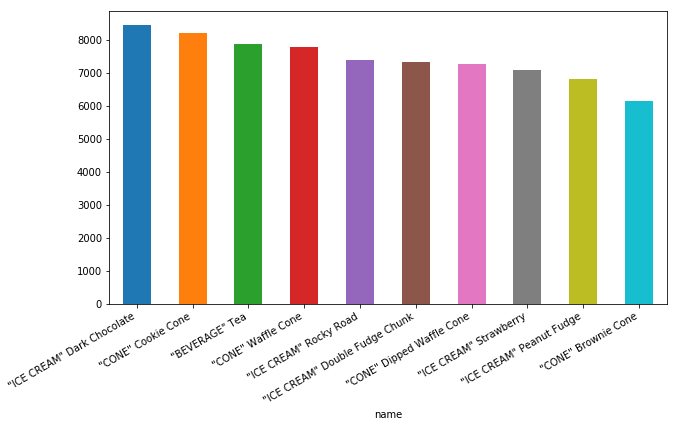

In [60]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()